For examining the frequencies of EIC, monopoly, corruption, consumption, interest, and other target words over time in ALL of EEBO

In [227]:
import os
import re
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

directory = r'C:\Users\amycw\Desktop\ecbc research'
folder = directory+"\\"+'eebo_clean'

In [258]:
dates = []
MFreqs = []
LFreqs = []
count=0
eic = re.compile("east india company|east-india company|east-india-company")
monopoly = re.compile('monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist|monopolizer|monopolize|monopolizes|monopolye|monopolyes')
lexicon = re.compile('may')
for cleanFile in os.listdir(folder):
    readFile = pd.read_csv(folder + "\\" + cleanFile) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        text = data.iloc[0].text
        if isinstance(data.iloc[0].date,str):
            date = (data.iloc[0].date)
        else:
            date = (data.iloc[0].date).astype(str)
        if ((date !='Date Not Found') & (date !='[\'Date Not Found\']')):
            if (date and date.strip()):
                datenum = re.search('\d{4}', date)
                if (datenum != None):
                    date = str(datenum.group(0))
                if (re.search(lexicon, text) != None):
                    dates.append(date)
#                     MFreqs.append(len(re.findall(eic,text)))
                    LFreqs.append(len(re.findall(lexicon,text)))
        count+=1
        if (count % 10000 == 0):
            print(count)

10000
20000
30000
40000
50000
60000
70000


In [259]:
after1400Dates = []
# after1400MFreqs = []
after1400LFreqs = []
idx = 0
for year in dates:
    if(int(year) in range(1400,1800)):
        after1400Dates.append(year)
#         after1400MFreqs.append(MFreqs[idx])
        after1400LFreqs.append(LFreqs[idx])
    idx+=1

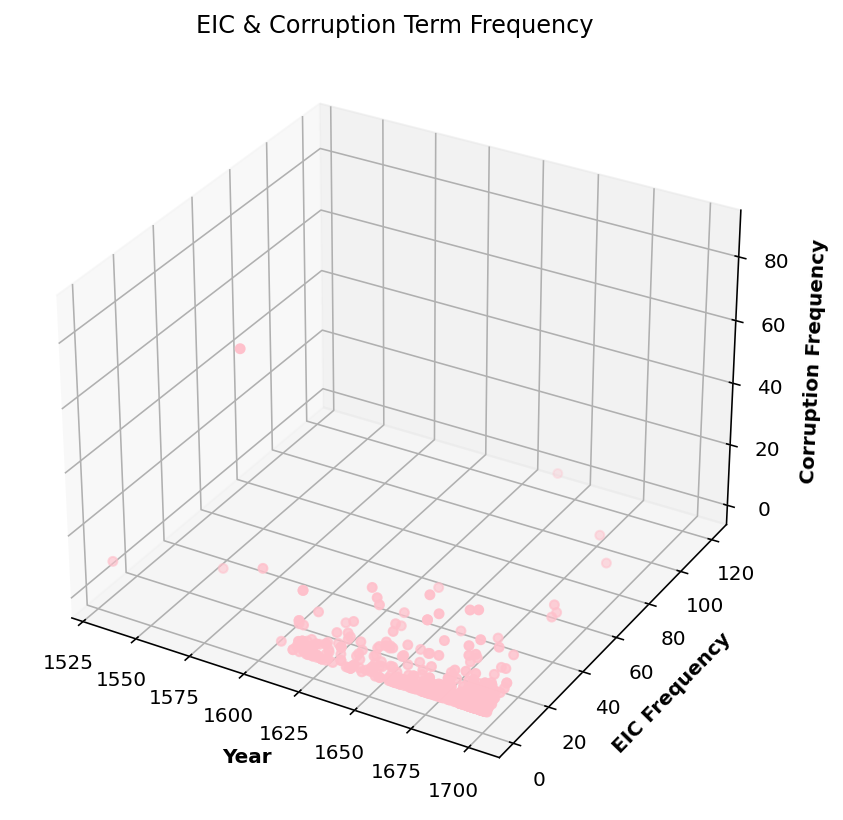

In [256]:
x = list(map(int, after1400Dates))
y = list(map(int, after1400MFreqs))
z = list(map(int, after1400LFreqs))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z, color = "pink")
plt.title("EIC & Corruption Term Frequency")
ax.set_xlabel('Year', fontweight ='bold')
ax.set_ylabel('EIC Frequency', fontweight ='bold')
ax.set_zlabel('Corruption Frequency', fontweight ='bold')
plt.show()

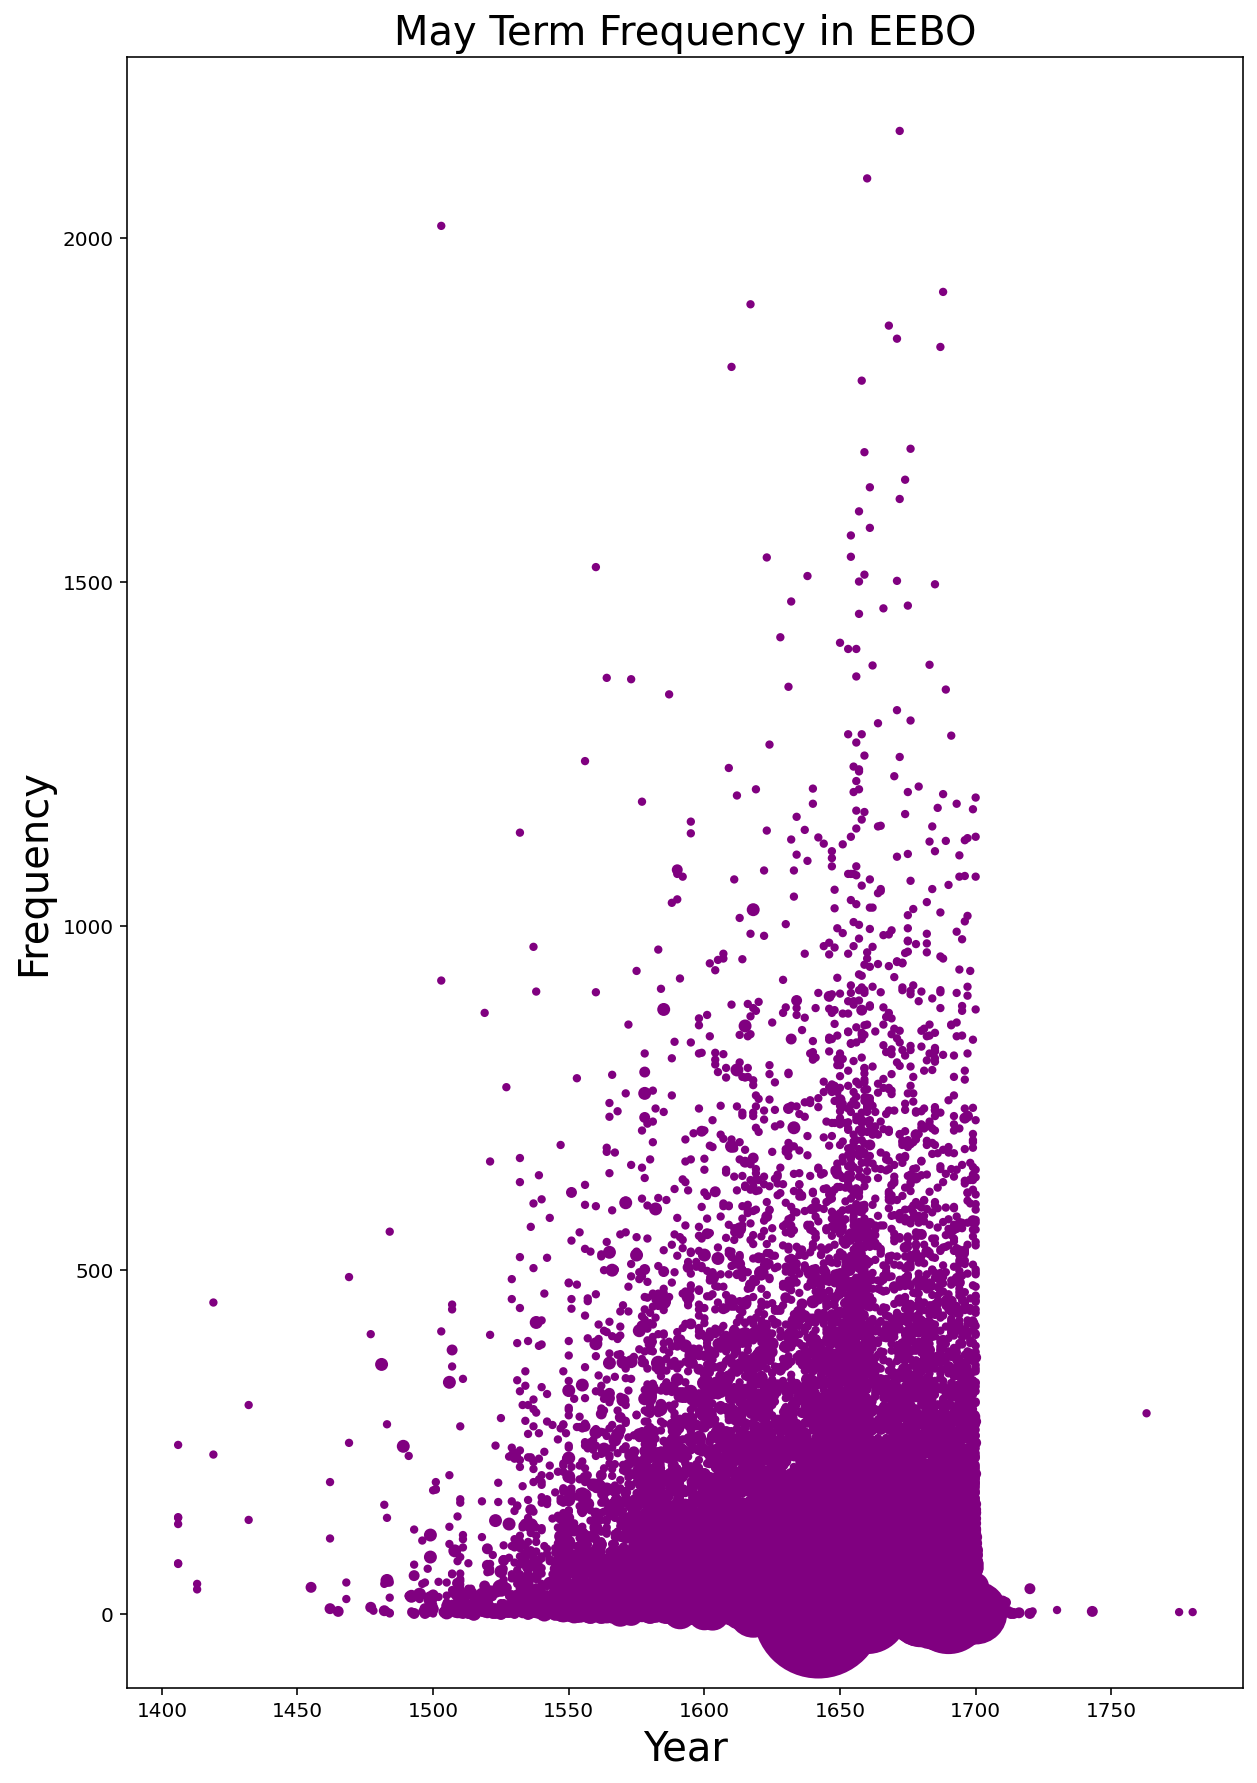

In [263]:
xData = list(map(int, after1400Dates))
yData = list(map(int, after1400LFreqs))
xyCoords=np.c_[xData,yData]
uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*10,c='purple',)

fig = plt.gcf()
fig.set_size_inches(10, 15)

plt.xlabel('Year', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('May Term Frequency in EEBO',fontsize=20)
plt.show()

In [211]:
print(monopolyDates)
print(monopolyFreqs)
print(eicDates)
print(eicFreqs)
print(corruptionD)
print(corruptionF)
print(consumptionD)
print(consumptionF)